# Data Glacier Internship Final Project

In [1]:
from google.colab import drive
drive.mount('/content/GDrive')

Drive already mounted at /content/GDrive; to attempt to forcibly remount, call drive.mount("/content/GDrive", force_remount=True).


In [2]:
%cd /content/GDrive/MyDrive

/content/GDrive/MyDrive


In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import seed
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from ml_models import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, classification_report

In [4]:
df_dummy = pd.read_excel('Dataset_Dummy.xlsx')
df_dummy.head()

,Unnamed: 0,Female,Male,African American,Asian,Caucasian,Other/Unknown,Hispanic,Not Hispanic,Unknown,Midwest,Northeast,Other/Unknown.1,South,West,55-65,65-75,<55,>75,CARDIOLOGY,CLINICAL NURSE SPECIALIST,EMERGENCY MEDICINE,ENDOCRINOLOGY,GASTROENTEROLOGY,GENERAL PRACTITIONER,GERIATRIC MEDICINE,HEMATOLOGY & ONCOLOGY,HOSPICE AND PALLIATIVE MEDICINE,HOSPITAL MEDICINE,NEPHROLOGY,NEUROLOGY,NUCLEAR MEDICINE,OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,OBSTETRICS AND GYNECOLOGY,OCCUPATIONAL MEDICINE,ONCOLOGY,OPHTHALMOLOGY,ORTHOPEDIC SURGERY,ORTHOPEDICS,OTOLARYNGOLOGY,...,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0
3,3,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [5]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import PIL
import h5py
import scipy
import PIL.Image
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, classification_report
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import plot_model

In [5]:
X_Data = df_dummy.iloc[:,0:-1].values
Y_Data = df_dummy.iloc[:,-1].values

In [6]:
print(X_Data.shape)
print(Y_Data.shape)

(3424, 119)
(3424,)


In [7]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.20, random_state=42)

In [8]:
print(X_Train.shape, X_Test.shape)
print(Y_Train.shape, Y_Test.shape)

(2739, 119) (685, 119)
(2739,) (685,)


In [9]:
X_Train = X_Train.astype('int')
X_Test = X_Test.astype('int')
Y_Train = Y_Train.astype('int')
Y_Test = Y_Test.astype('int')

## Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,min_samples_leaf=2,min_samples_split=3)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error is: %f" % MAE)


Mean Absolute Error is: 0.197080


In [11]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[383,  48],
       [ 87, 167]])

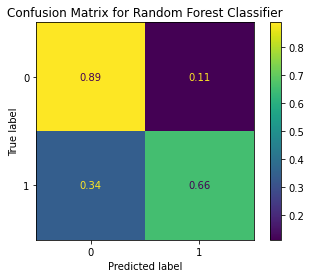

In [12]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, normalize= 'true')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show(matrix)

In [13]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8029197080291971
Precision = 0.8007476966306338
Recall = 0.7730557027239344
f1-Score = 0.7989908718401675


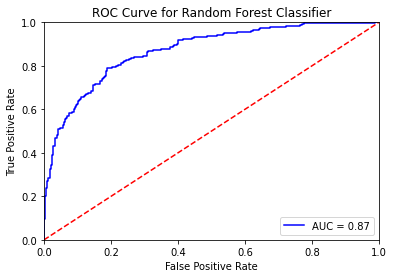

In [14]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_RF, tpr_RF, threshold = roc_curve(Y_Test, Probs)
roc_auc_RF = auc(fpr_RF, tpr_RF)
#
plt.title('ROC Curve for Random Forest Classifier')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## BaggingClassifier

In [15]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=10, random_state=0)
clf = clf.fit(X_Train, Y_Train)
Preds=clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error is: %f" % MAE)


Mean Absolute Error is: 0.220438


In [16]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[370,  61],
       [ 90, 164]])

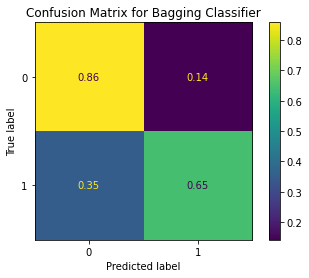

In [17]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, normalize= 'true')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show(matrix)

In [18]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7795620437956204
Precision = 0.7763674318558481
Recall = 0.752068984416391
f1-Score = 0.7764764526712827


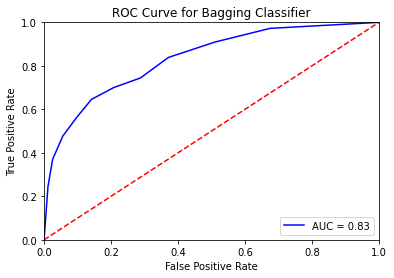

In [19]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_RF, tpr_RF, threshold = roc_curve(Y_Test, Probs)
roc_auc_RF = auc(fpr_RF, tpr_RF)
#
plt.title('ROC Curve for Bagging Classifier')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Neural Network 


In [20]:
model = Sequential()
model.add(Dense(24, input_dim=119, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                2880      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 3,193
Trainable params: 3,193
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(X_Train, Y_Train, epochs=150, batch_size=10,shuffle=True)

Epoch 1/150
274/274 [==============================] - 1s 2ms/step - loss: 17.7387 - accuracy: 0.5357
Epoch 2/150
274/274 [==============================] - 1s 2ms/step - loss: 0.5872 - accuracy: 0.7335
Epoch 3/150
274/274 [==============================] - 1s 2ms/step - loss: 0.5792 - accuracy: 0.7434
Epoch 4/150
274/274 [==============================] - 1s 2ms/step - loss: 0.5994 - accuracy: 0.7369
Epoch 5/150
274/274 [==============================] - 1s 2ms/step - loss: 0.5698 - accuracy: 0.7654
Epoch 6/150
274/274 [==============================] - 1s 2ms/step - loss: 0.5297 - accuracy: 0.7644
Epoch 7/150
274/274 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.7722
Epoch 8/150
274/274 [==============================] - 1s 2ms/step - loss: 0.5422 - accuracy: 0.7636
Epoch 9/150
274/274 [==============================] - 1s 2ms/step - loss: 0.4899 - accuracy: 0.7889
Epoch 10/150
274/274 [==============================] - 1s 2ms/step - loss: 0.4676 - accur

In [24]:
Y_pred = model.predict_classes(X_Test, verbose=0)
Probs= model.predict_proba(X_Test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


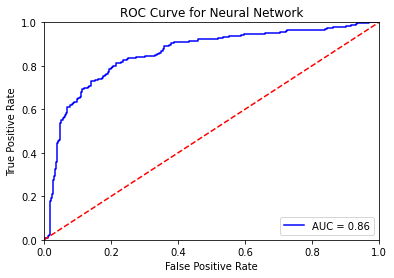

In [25]:

fpr_RF, tpr_RF, threshold = roc_curve(Y_Test, Probs)
roc_auc_RF = auc(fpr_RF, tpr_RF)
#
plt.title('ROC Curve for Neural Network')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:

print(classification_report(Y_Test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       431
           1       0.76      0.70      0.73       254

    accuracy                           0.81       685
   macro avg       0.79      0.79      0.79       685
weighted avg       0.80      0.81      0.80       685



In [27]:
_, accuracy = model.evaluate(X_Train, Y_Train)
print('Accuracy: %.2f' % (accuracy*100))

86/86 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8518
Accuracy: 85.18


In [28]:

_, test_acc = model.evaluate(X_Test, Y_Test, verbose=0)
print('Accuracy: %.2f' % (test_acc*100))

Accuracy: 80.58
